intro

In [1]:
"""Conexión a la base de datos"""

import pandas
import sqlalchemy
import keyboard
import getpass

def create_database_connection(user, password, host, database_name):
    try:
        engine = sqlalchemy.create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database_name}")
        connection = engine.connect()
        print("\nConexión a la base de datos establecida con éxito.\n")
        return engine, connection
    except Exception as e:
        print("\nError en la conexión a la base de datos:\n", e)
        return None, None

def get_table_names(engine):
    inspector = sqlalchemy.inspect(engine)
    table_names = inspector.get_table_names()
    if table_names:
        print("Tablas encontradas en la base de datos:", table_names)
    else:
        print(f"Ninguna tabla encontrada en la base de datos.\n\nSalida del programa")  
    return table_names

def load_tables_into_dataframes(connection, table_names):
    for table_name in table_names:
        query = f"SELECT * FROM {table_name}"
        globals()[f"df_{table_name}"] = pandas.read_sql(query, connection)
        print(f"\nDatos cargados para la tabla: {table_name}")  # Stampa per verificare

def display_dataframes(table_names):
    print("\nContenido de las tablas:")
    for table_name in table_names:
        df_name = f"df_{table_name}"
        df = globals()[df_name]
        
        print("\n**************************************\n**************************************")
        print(f"Tabla: {table_name}")
        print("\n**************************************\n**************************************")
        print("\n***********Información general:***********\n")
        print(df.info(), "\n")        
        print("\n**********************Primeras 3 filas:**********************\n\n", df.head(3), "\n")
        print("\n**********************Últimas 3 filas:**********************\n\n", df.tail(3), "\n")

print("Programa para la conexión a una base de datos MySQL y la visualización de sus tablas en DataFrame utilizando la biblioteca Pandas.")
print("Presiona 'Esc' para salir.")

# Input de conexión
user = input("Introduce el nombre de usuario para la base de datos (ej: root)")
if not keyboard.is_pressed('esc'): password = getpass.getpass("Introduce la contraseña para la base de datos (ej:****)")
if not keyboard.is_pressed('esc'): host = input("Introduce el host de la base de datos (ej: localhost)")
if not keyboard.is_pressed('esc'): database_name = input("Introduce el nombre de la base de datos (ej: sprint_4_v2)")

# Connessione e caricamento delle tabelle
if not keyboard.is_pressed('esc'):
    engine, connection = create_database_connection(user, password, host, database_name)

    if connection:
        table_names = get_table_names(engine)

        if table_names:
            load_tables_into_dataframes(connection, table_names)
            display_dataframes(table_names)

if keyboard.is_pressed('esc'): 
    print("Salida del programa")



Programa para la conexión a una base de datos MySQL y la visualización de sus tablas en DataFrame utilizando la biblioteca Pandas.
Presiona 'Esc' para salir.

Conexión a la base de datos establecida con éxito.

Tablas encontradas en la base de datos: ['companies', 'credit_cards', 'products', 'transactions', 'users']

Datos cargados para la tabla: companies

Datos cargados para la tabla: credit_cards

Datos cargados para la tabla: products

Datos cargados para la tabla: transactions

Datos cargados para la tabla: users

Contenido de las tablas:

**************************************
**************************************
Tabla: companies

**************************************
**************************************

***********Información general:***********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 

1.1

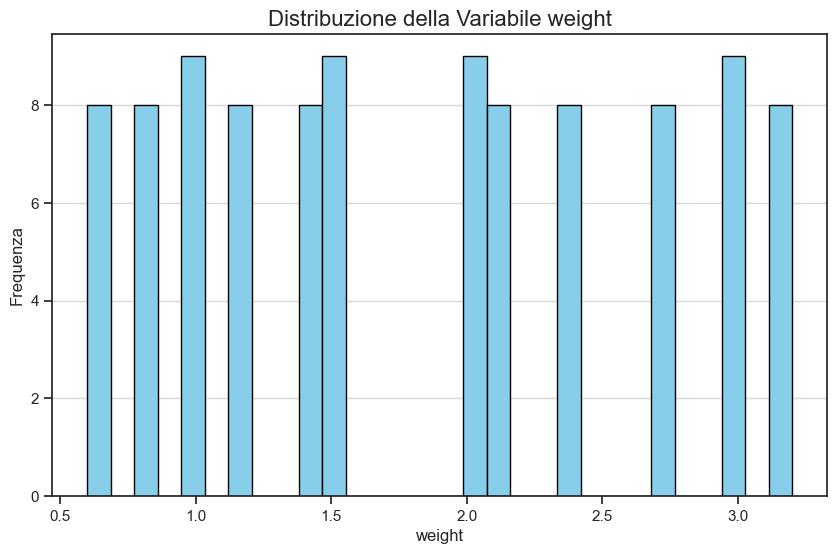

In [52]:
"""Visualización de una variable numérica como histograma con Matplotlib"""

import matplotlib.pyplot as plt

# Verifica se la tabella 'transactions' è stata caricata
if 'df_products' in globals():
    df_products = globals()['df_products']
    
    # Seleziona la colonna numerica
    weight = df_products['weight']    

    # Crea un istogramma con Matplotlib
    plt.figure(figsize=(10, 6))
    plt.hist(weight, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribuzione della Variabile weight', fontsize=16)
    plt.xlabel('weight', fontsize=12)
    plt.ylabel('Frequenza', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
  
else:
    print("La tabella 'transactions' non è stata caricata correttamente.")


1.2

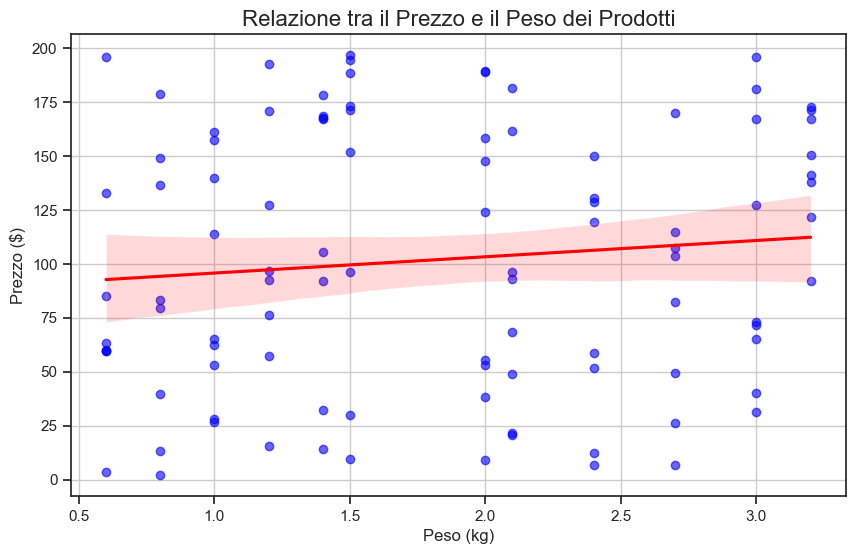

In [48]:
"""Gráfico de dispersión con línea de regresión para la visualización de dos variables numéricas con Matplotlib y Seaborn"""

import seaborn as sns
import matplotlib.pyplot as plt

# Assumiamo che 'df_products' sia il DataFrame che contiene la tabella 'products'
# Eseguiamo la conversione della colonna 'price' da oggetto a numerico
df_products['price_numeric'] = df_products['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Crea un grafico a dispersione con la linea di regressione (utilizzando Seaborn)
plt.figure(figsize=(10, 6))
sns.regplot(x='weight', y='price_numeric', data=df_products, scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relazione tra il Prezzo e il Peso dei Prodotti', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=12)
plt.ylabel('Prezzo ($)', fontsize=12)
plt.grid(True)
plt.show()



1.3

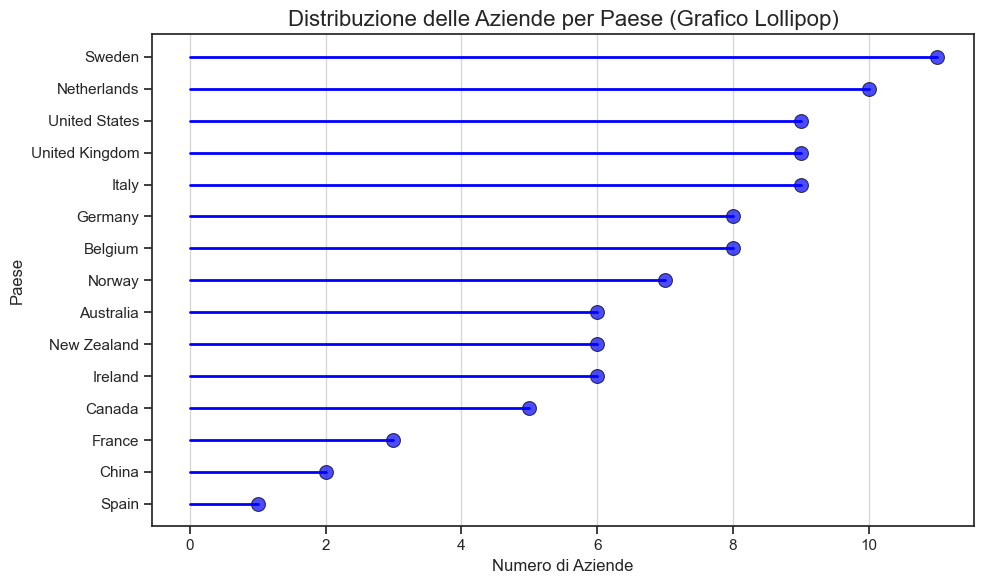

In [49]:
"""Visualización de una variable categorica como lollipop con Matplotlib y Seaborn"""

import matplotlib.pyplot as plt
import seaborn as sns

# Verifica se la tabella 'companies' è stata caricata
if 'df_companies' in globals():
    df_companies = globals()['df_companies']
    
    # Seleziona la colonna categórica
    country = df_companies['country']
    
    # Calcola il conteggio per ogni paese
    country_counts = country.value_counts().reset_index()
    country_counts.columns = ['Country', 'Count']
    
    # Crea il grafico Lollipop
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=country_counts, x='Count', y='Country', s=100, color='blue', alpha=0.7, marker='o', edgecolor='black')
    
    # Aggiungi linee per il grafico Lollipop
    for i in range(len(country_counts)):
        plt.plot([0, country_counts['Count'][i]], [i, i], color='blue', lw=2)
    
    plt.title('Distribuzione delle Aziende per Paese (Grafico Lollipop)', fontsize=16)
    plt.xlabel('Numero di Aziende', fontsize=12)
    plt.ylabel('Paese', fontsize=12)
    plt.grid(axis='x', alpha=0.75)
    plt.tight_layout()
    plt.show()
else:
    print("La tabella 'companies' non è stata caricata correttamente.")



1.4

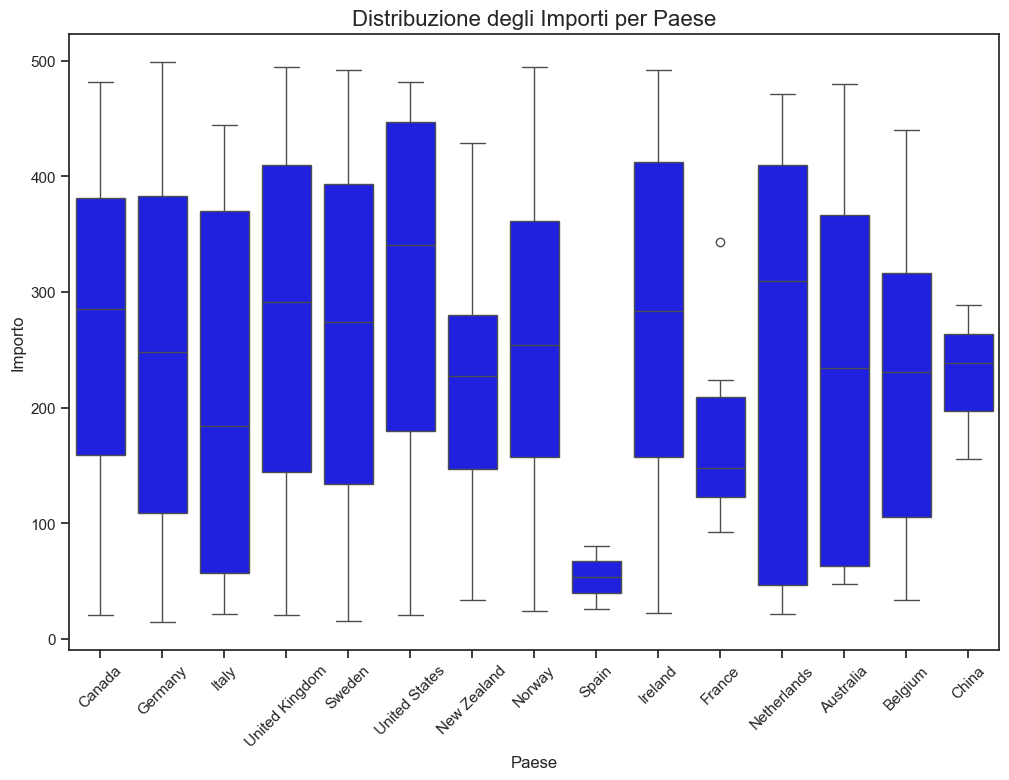

In [50]:
"""Visualización de una variable categorica y una numérica como box plot con Matplotlib y Seaborn haciendo merge/join de dos tablas"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unire le tabelle 'transactions' e 'companies' usando 'business_id' e 'company_id'
df_merged = pd.merge(
    df_transactions,  # Tabella delle transazioni
    df_companies,     # Tabella delle aziende
    left_on='business_id',  # Colonna nella tabella transactions
    right_on='company_id',  # Colonna nella tabella companies
    how='left'  # Unione sinistra per mantenere tutte le transazioni
)

# Mostra il risultato dell'unione
#print("Tabella combinata:")
#print(df_merged.head())  # Mostra le prime righe del DataFrame combinato

# Crea il boxplot per visualizzare la distribuzione degli importi per paese
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='country',  # Variabile categorica (paese)
    y='amount',   # Variabile numerica (importo)
    data=df_merged,  # Dati uniti
    color='blue'  # Imposta il colore blu per tutte le barre
)

plt.title('Distribuzione degli Importi per Paese', fontsize=16)
plt.xlabel('Paese', fontsize=12)
plt.ylabel('Importo', fontsize=12)
plt.xticks(rotation=45)
plt.show()


1.5

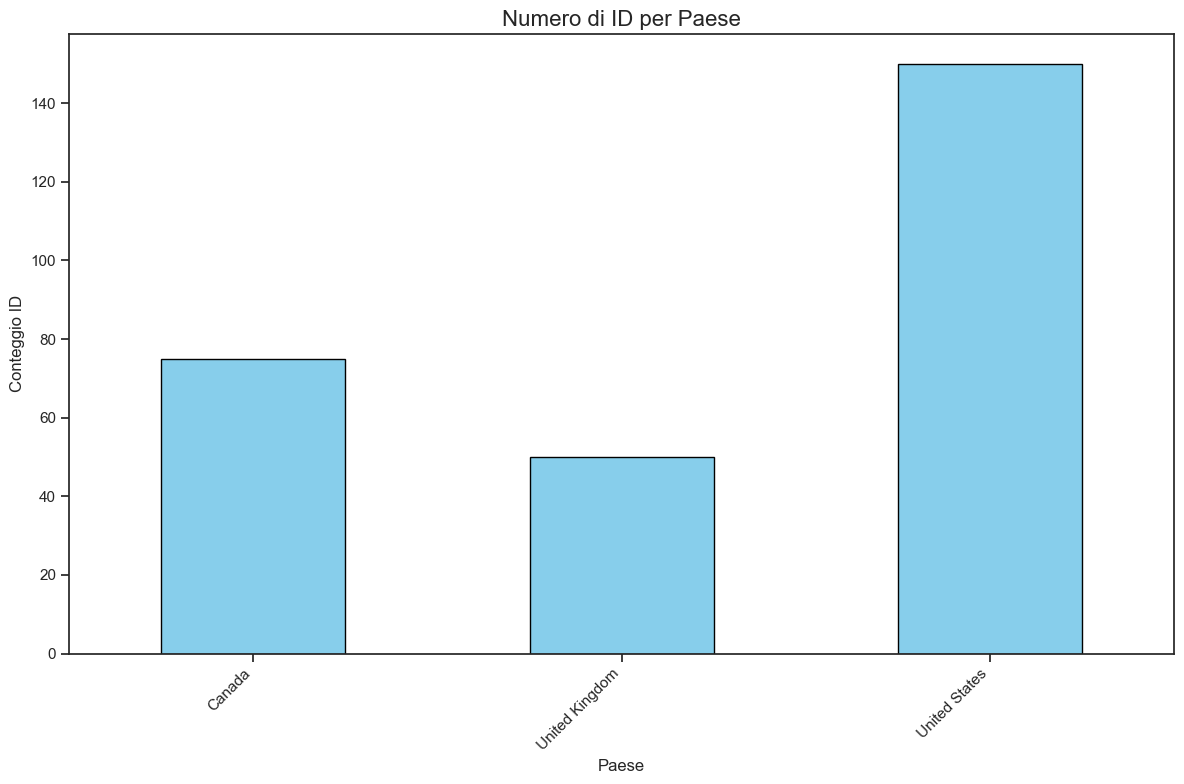

In [ ]:
"""Visualización de dos variables categoricas como histograma con Matplotlib"""
import matplotlib.pyplot as plt

# Calcolo del numero di ID per ciascun paese
country_id_counts = df_users.groupby('country')['id'].count()

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
country_id_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Aggiunta di etichette e titolo
plt.title('Numero di ID per Paese', fontsize=16)
plt.xlabel('Paese', fontsize=12)
plt.ylabel('Conteggio ID', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Per evitare sovrapposizioni
plt.show()


1.6

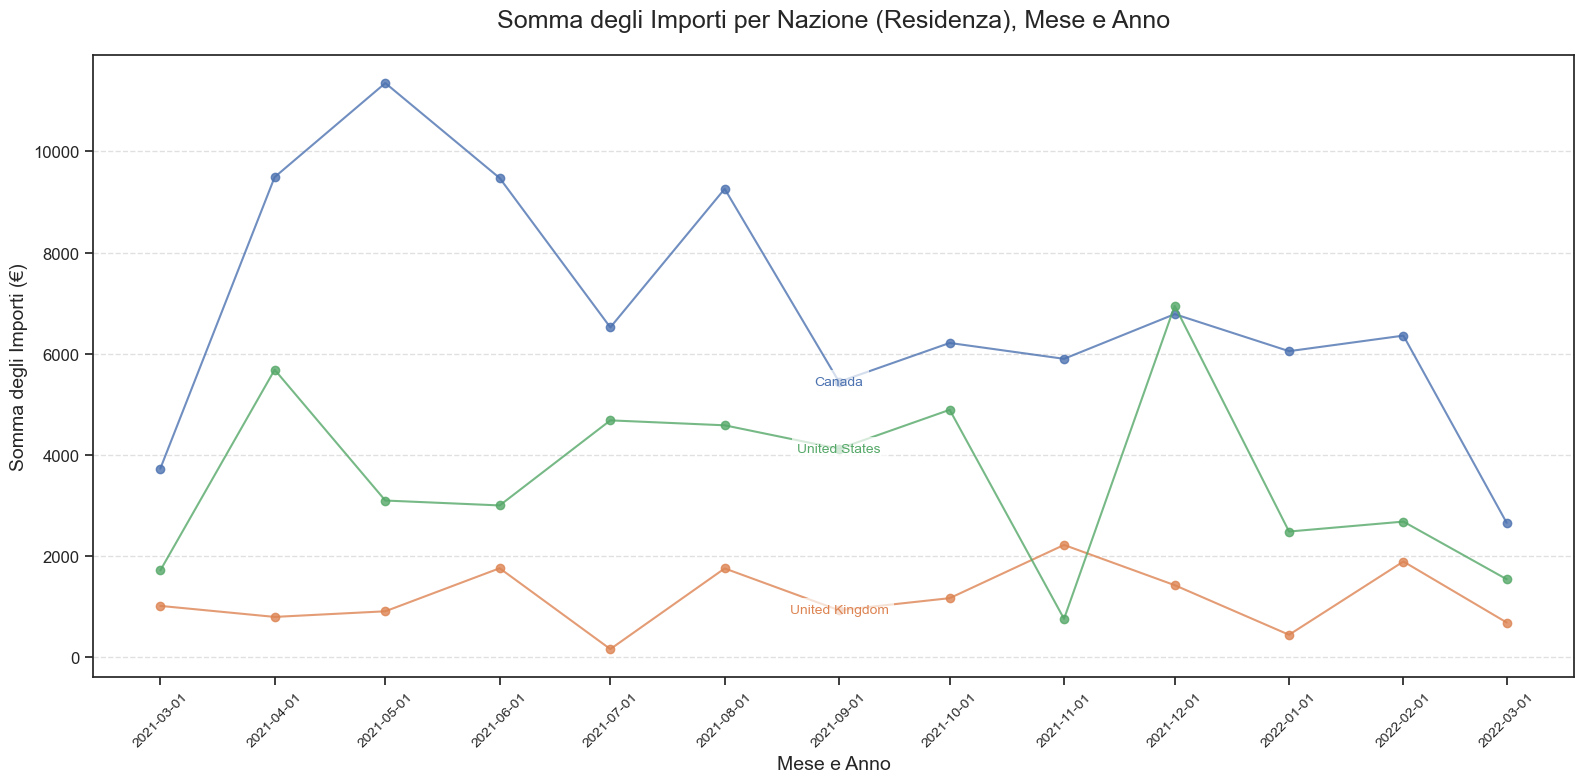

In [89]:
"""Visualización de tres variables como line plot con Matplotlib"""

import pandas as pd
import matplotlib.pyplot as plt

# Convertire la colonna timestamp in oggetto datetime e creare colonne "year" e "month"
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['year'] = df_transactions['timestamp'].dt.year
df_transactions['month'] = df_transactions['timestamp'].dt.month

# Unire le tabelle 'transactions' e 'users' usando 'user_id'
df_merged = pd.merge(
    df_transactions,  # Tabella delle transazioni
    df_users,         # Tabella degli utenti
    left_on='user_id',  # Colonna nella tabella transactions
    right_on='id',  # Colonna nella tabella users
    how='left'  # Unione sinistra per mantenere tutte le transazioni
)

# Calcolare la somma degli amount per nazione (residenza), anno e mese
df_grouped = df_merged.groupby(['country', 'year', 'month'])['amount'].sum().reset_index()

# Creare una nuova colonna combinata "year_month" per una rappresentazione continua dei dati
df_grouped['year_month'] = pd.to_datetime(df_grouped[['year', 'month']].assign(day=1))

# Creazione del grafico a linee
plt.figure(figsize=(16, 8))

for country in df_grouped['country'].unique():
    country_data = df_grouped[df_grouped['country'] == country]
    line, = plt.plot(
        country_data['year_month'],  # Mese e anno sull'asse X
        country_data['amount'],  # Somma degli importi sull'asse Y
        marker='o',  # Aggiungere punti sulle linee
        label=country,  # Etichetta della nazione
        alpha=0.8
    )
    
    # Determinare una posizione strategica: inizio, fine o punto medio
    num_points = len(country_data)
    if num_points > 2:
        random_idx = num_points // 2  # Posizione centrale se ci sono più di due punti
    else:
        random_idx = 0 if num_points == 1 else -1  # Inizio o fine
    
    x_pos = country_data['year_month'].iloc[random_idx]
    y_pos = country_data['amount'].iloc[random_idx]
    
    # Posizionare il nome della nazione sulla linea con colore corrispondente
    plt.text(
        x_pos,  # Posizione sull'asse X
        y_pos,  # Posizione sull'asse Y
        country,  # Nome della nazione
        fontsize=10,
        color=line.get_color(),  # Stesso colore della linea
        ha='right' if random_idx == 0 else ('left' if random_idx == -1 else 'center'),
        va='center',  # Allineamento verticale
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # Sfondo per leggibilità
    )

# Personalizzazione del grafico
plt.title('Somma degli Importi per Nazione (Residenza), Mese e Anno', fontsize=18, pad=20)
plt.xlabel('Mese e Anno', fontsize=14)
plt.ylabel('Somma degli Importi (€)', fontsize=14)
plt.xticks(
    df_grouped['year_month'].dt.strftime('%Y-%m').unique(), 
    fontsize=10, 
    rotation=45
)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Migliorare il layout
plt.tight_layout()
plt.show()


1.7

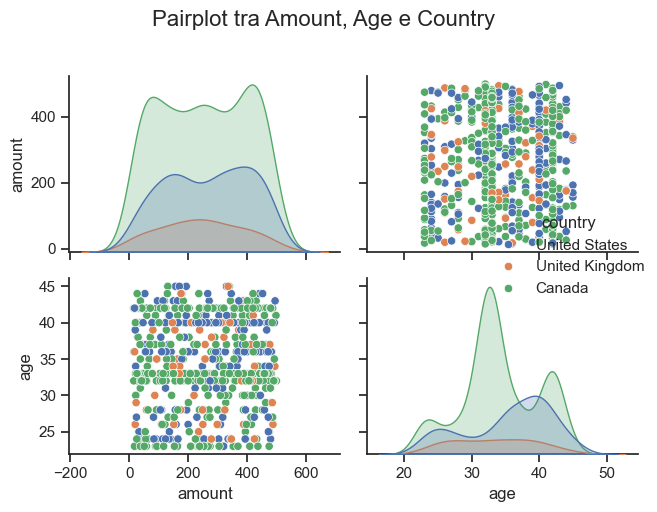

In [ ]:
"""Visualización de tres variables como line plot con Matplotlib"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Convertire la colonna timestamp in oggetto datetime e creare colonna "year"
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['year'] = df_transactions['timestamp'].dt.year

# Unire le tabelle 'transactions' e 'users' usando 'user_id' e 'id'
df_merged = pd.merge(
    df_transactions,  # Tabella delle transazioni
    df_users,         # Tabella degli utenti
    left_on='user_id',  # Colonna nella tabella transactions
    right_on='id',      # Colonna nella tabella users
    how='left'  # Unione sinistra per mantenere tutte le transazioni
)

# Convertire 'birth_date' in datetime
df_merged['birth_date'] = pd.to_datetime(df_merged['birth_date'], format='%b %d, %Y')

# Calcolare l'età in base alla data di nascita
df_merged['age'] = df_merged['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)

# Selezionare solo le colonne 'amount', 'age', 'country'
df_pairplot = df_merged[['amount', 'age', 'country']]

# Creare il pairplot per esplorare le relazioni tra 'amount', 'age' e 'country'
sns.pairplot(df_pairplot, hue='country', markers='o')

# Personalizzare il grafico
plt.suptitle('Pairplot tra Amount, Age e Country', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()
